<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``


In [1]:
# import required packages
import numpy as np
import math
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import random

C:\Users\Home\AppData\Local\Temp\ipykernel_14736\255958840.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[:,i] = np.array(list(map(lambda s: math.pow(s,i), x)))


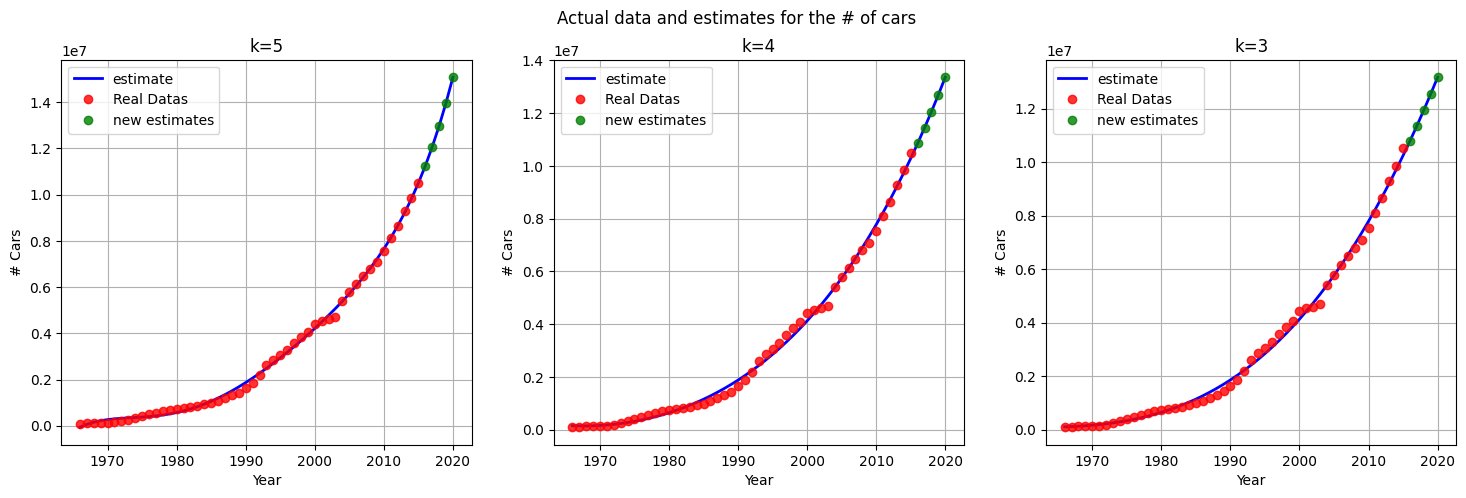

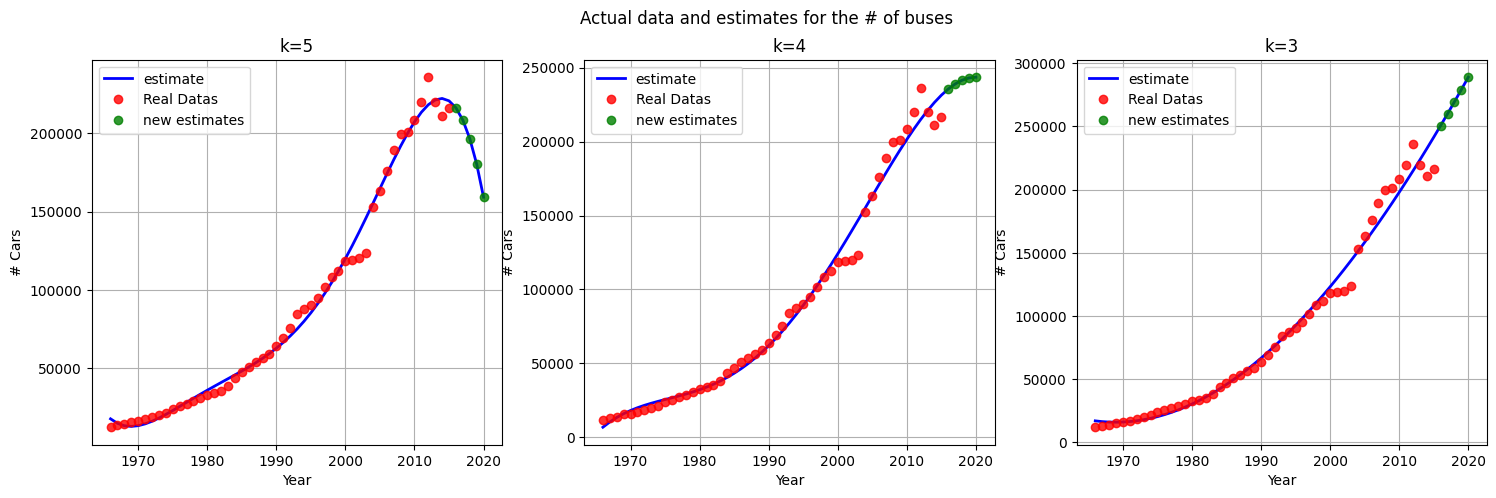

In [2]:
# Code cell
def measure_ls(x,y,k):
    k = k+1
    A = np.zeros([len(x), k])
    for i in range(k):
        A[:,i] = np.array(list(map(lambda s: math.pow(s,i), x)))

    xls = np.linalg.inv(np.transpose(A) @ A) @ np.transpose(A) @ y

    B = np.zeros([len(x)+5, k])
    B[0:len(x),:] = A
    B[len(x),:] = np.array(list(map(lambda s: math.pow(2016-1966,s), range(k))))
    B[len(x)+1,:] = np.array(list(map(lambda s: math.pow(2017-1966,s), range(k))))
    B[len(x)+2,:] = np.array(list(map(lambda s: math.pow(2018-1966,s), range(k))))
    B[len(x)+3,:] = np.array(list(map(lambda s: math.pow(2019-1966,s), range(k))))
    B[len(x)+4,:] = np.array(list(map(lambda s: math.pow(2020-1966,s), range(k))))

    new_y = B @ xls
    return xls,new_y

def show_res(yls,years,base_year,datas):
    new_years = np.array(range(1966,2021,1))

    plt.plot(new_years, yls , label='estimate', linewidth=2, color='b')
    plt.plot(years+base_year, datas, marker = 'o', linestyle='', label='Real Datas', color='r',alpha=0.8)
    plt.plot(new_years[len(new_years)-5:len(new_years)], yls[len(new_years)-5:len(new_years)], marker = 'o', linestyle='' ,label='new estimates', color='g',alpha=0.8)


    plt.xlabel("Year")
    plt.ylabel("# Cars")
    plt.legend()
    plt.grid()


data = pd.read_csv('arac.csv')
data = np.matrix(data)

years = np.array(list(map(lambda x: int(str(x).split(";")[0][3:7]), data))).reshape(50,1)
cars = np.array(list(map(lambda x: int(str(x).split(";")[2]), data))).reshape(50,1)
buses = np.array(list(map(lambda x: int(str(x).split(";")[4]), data))).reshape(50,1)

base_year = years[0]
years = years - base_year


xls_buses_3,y_buses_3 = measure_ls(years,buses,3)
xls_buses_4,y_buses_4 = measure_ls(years,buses,4)
xls_buses_5,y_buses_5 = measure_ls(years,buses,5)

xls_cars_3,y_cars_3 = measure_ls(years,cars,3)
xls_cars_4,y_cars_4 = measure_ls(years,cars,4)
xls_cars_5,y_cars_5 = measure_ls(years,cars,5)

fig1, axes1 = plt.subplots(1, 3, figsize=(18, 5))
plt1 = plt.subplot(1, 3, 1)
show_res(y_cars_5,years,base_year,cars)
plt.title("k=5")
plt.subplot(1, 3, 2)
show_res(y_cars_4,years,base_year,cars)
plt.title("k=4")
plt.subplot(1, 3, 3)
show_res(y_cars_3,years,base_year,cars)
plt.title("k=3")
plt.suptitle('Actual data and estimates for the # of cars')
plt.show()

fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5))
plt.subplot(1, 3, 1)
show_res(y_buses_5,years,base_year,buses)
plt.title("k=5")
plt.subplot(1, 3, 2)
show_res(y_buses_4,years,base_year,buses)
plt.title("k=4")
plt.subplot(1, 3, 3)
show_res(y_buses_3,years,base_year,buses)
plt.title("k=3")
plt.suptitle('Actual data and estimates for the # of buses')
plt2 = plt.show()



<font color="blue">comparing results :
For the number of cars, this method estimates the number of cars in future years with good accuracy. Because there is no discontinuity or jump in the data on which the estimate is based.
But in the data related to the number of buses, due to the jump in 2005 and because the data is scattered in the last years of the estimate, There is a greater amount of error in the estimates and as can be seen, the behavior of the graph changes drastically for different polynomials.




In [3]:
print("Estimation of # of cars:")
print("@ k=3 :")
print("2016: %.2f | 2017: %.2f | 2018: %.2f | 2019: %.2f | 2020: %.2f" %(float(y_cars_3[len(y_cars_3)-5]),float(y_cars_3[len(y_cars_3)-4]),float(y_cars_3[len(y_cars_3)-3]),float(y_cars_3[len(y_cars_3)-2]),float(y_cars_3[len(y_cars_3)-1])))
print("@ k=4 :")
print("2016: %.2f | 2017: %.2f | 2018: %.2f | 2019: %.2f | 2020: %.2f" %(float(y_cars_4[len(y_cars_4)-5]),float(y_cars_4[len(y_cars_4)-4]),float(y_cars_4[len(y_cars_4)-3]),float(y_cars_4[len(y_cars_4)-2]),float(y_cars_4[len(y_cars_4)-1])))
print("@ k=5 :")
print("2016: %.2f | 2017: %.2f | 2018: %.2f | 2019: %.2f | 2020: %.2f" %(float(y_cars_5[len(y_cars_5)-5]),float(y_cars_5[len(y_cars_5)-4]),float(y_cars_5[len(y_cars_5)-3]),float(y_cars_5[len(y_cars_5)-2]),float(y_cars_5[len(y_cars_5)-1])))
print()
print("Estimation of # of buses:")
print("@ k=3 :")
print("2016: %.2f | 2017: %.2f | 2018: %.2f | 2019: %.2f | 2020: %.2f" %(float(y_buses_3[len(y_buses_3)-5]),float(y_buses_3[len(y_buses_3)-4]),float(y_buses_3[len(y_buses_3)-3]),float(y_buses_3[len(y_buses_3)-2]),float(y_buses_3[len(y_buses_3)-1])))
print("@ k=4 :")
print("2016: %.2f | 2017: %.2f | 2018: %.2f | 2019: %.2f | 2020: %.2f" %(float(y_buses_4[len(y_buses_4)-5]),float(y_buses_4[len(y_buses_4)-4]),float(y_buses_4[len(y_buses_4)-3]),float(y_buses_4[len(y_buses_4)-2]),float(y_buses_4[len(y_buses_4)-1])))
print("@ k=5 :")
print("2016: %.2f | 2017: %.2f | 2018: %.2f | 2019: %.2f | 2020: %.2f" %(float(y_buses_5[len(y_buses_5)-5]),float(y_buses_5[len(y_buses_5)-4]),float(y_buses_5[len(y_buses_5)-3]),float(y_buses_5[len(y_buses_5)-2]),float(y_buses_5[len(y_buses_5)-1])))

Estimation of # of cars:
@ k=3 :
2016: 10791127.09 | 2017: 11356456.75 | 2018: 11941292.30 | 2019: 12545963.58 | 2020: 13170800.38
@ k=4 :
2016: 10855766.46 | 2017: 11446444.89 | 2018: 12061016.51 | 2019: 12700197.43 | 2020: 13364718.08
@ k=5 :
2016: 11246441.38 | 2017: 12066928.60 | 2018: 12973180.59 | 2019: 13975252.59 | 2020: 15083992.40

Estimation of # of buses:
@ k=3 :
2016: 250684.75 | 2017: 260030.13 | 2018: 269525.79 | 2019: 279169.84 | 2020: 288960.37
@ k=4 :
2016: 235522.29 | 2017: 238921.60 | 2018: 241442.07 | 2019: 242991.18 | 2020: 243473.07
@ k=5 :
2016: 216376.74 | 2017: 208513.96 | 2018: 196740.25 | 2019: 180505.40 | 2020: 159217.74


C:\Users\Home\AppData\Local\Temp\ipykernel_14736\370393602.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("2016: %.2f | 2017: %.2f | 2018: %.2f | 2019: %.2f | 2020: %.2f" %(float(y_cars_3[len(y_cars_3)-5]),float(y_cars_3[len(y_cars_3)-4]),float(y_cars_3[len(y_cars_3)-3]),float(y_cars_3[len(y_cars_3)-2]),float(y_cars_3[len(y_cars_3)-1])))
C:\Users\Home\AppData\Local\Temp\ipykernel_14736\370393602.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("2016: %.2f | 2017: %.2f | 2018: %.2f | 2019: %.2f | 2020: %.2f" %(float(y_cars_4[len(y_cars_4)-5]),float(y_cars_4[len(y_cars_4)-4]),float(y_cars_4[len(y_cars_4)-3]),float(y_cars

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [316]:
def load_data(file_name):

    X = np.array(pd.read_csv(file_name,header=None))

    return X

In [317]:
X = load_data('image.csv')
print(X.shape)
print(X)

(600, 2)
[[ 3.69959867  3.89235252]
 [ 2.6413343   2.97095728]
 [-1.66329434  3.35560306]
 ...
 [ 0.5785215   0.34965446]
 [ 2.6710785   2.30721969]
 [-1.04525337  1.21114529]]


- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [318]:
def min_length_to_cluster(X1,M):

    lengths = np.array(list(map(lambda x: np.linalg.norm(X1-x), M)))
    min_number = min(lengths)
    index = np.where(lengths == min_number)
    s = np.zeros((1,(len(M))))
    s[0,index] = 1
    return s


def kmeans(X, K):
    n = len(X)
    d = len(X[0])
    M = np.zeros((K,d))
    U = np.zeros((n,K))
    M_new = np.zeros((K,d))

    first_random_clusters = random.sample(range(n),K)
    for i in range(K):
        M[i,:] = X[first_random_clusters[i],:]

    index =0
    while index!=100:
        for i in range(n):
            U[i,:] = min_length_to_cluster(X[i,:],M)

        for i in range(K):
            members = 0
            sum = np.zeros((1,2))
            for j in range(n):
                if U[j,i] == 1:
                    members = members + 1
                    sum = sum + X[j,:]
            M_new[i,:] = sum/members
        index = index + 1
        if np.array_equal(M, M_new) :
            break
        M = np.copy(M_new)
    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [319]:
def plot_clusters(X, M, U):

    k = len(M)
    d = np.zeros(k)

    colors = np.zeros((k,3))
    for i in range(k):
        colors[i,:] =  (np.random.randint(0, 256, size=(1,3))/256)

    #print(colors)
    #print(color_map.shape)
    for q in range(k):
        one_cluster_points = X[np.where(U[:, q] == 1)]
        d[q] = np.linalg.norm(one_cluster_points - M[q], axis=1).max()
        #print(one_cluster_points)
        circle = plt.Circle((M[q, 0], M[q, 1]),d[q], color='black', fill=False)
        plt.gca().add_patch(circle)
        plt.scatter(one_cluster_points[:,0], one_cluster_points[:,1], label=f'Cluster {q + 1}',c=colors[q],)

    #print(d)
    plt.scatter(M[:,0], M[:,1], label='centroids',c='black',marker='*',s=70)
    #print(color_map)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()



**<font color="red"> Don't edit the code in the following cell!</font>**

C:\Users\Home\AppData\Local\Temp\ipykernel_12392\3807409842.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(one_cluster_points[:,0], one_cluster_points[:,1], label=f'Cluster {q + 1}',c=colors[q],)


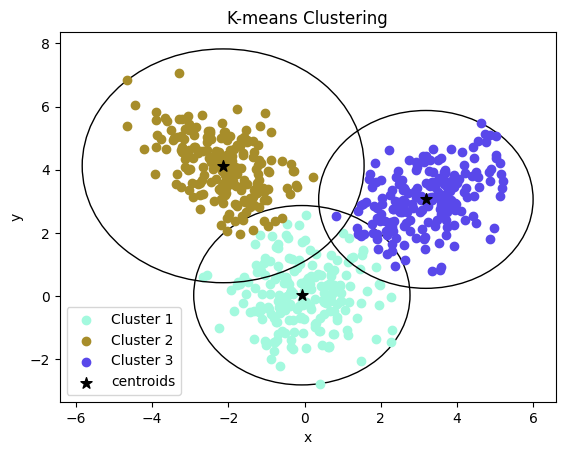

In [329]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

<font color="blue"> Advantages:
1-Simplicity and Speed: K-means is easy to understand and implement, making it a popular choice for clustering tasks.
2-Scalability: The algorithm can handle large datasets efficiently and can be parallelized or distributed, making it suitable for big data applications.
3-Robustness: K-means is robust and stable, able to handle outliers and noise well, and it produces consistent results across different runs.
4-Generalization: It can adapt to clusters of different shapes and sizes, such as elliptical clusters, and can be relatively simple to modify for different scenarios.

<font color="blue">Disadvantages:
    1-Sensitivity to Parameters: K-means is sensitive to the choice of the number of clusters (k), initial centroids, and the scale and distribution of the data, which can impact the quality of the clustering results.
    2-Assumption of Spherical Clusters: It assumes that clusters are spherical and have similar variance, which may not be suitable for complex or irregular clusters.
    3-Hard Clustering: It assigns each data point to a single cluster (hard clustering), which may not be suitable for scenarios where data points belong to multiple clusters with different probabilities (soft clustering).
    4-Local Optima: K-means may converge to a local optimum, and repeated runs with different initializations are often necessary to obtain a satisfactory result.

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

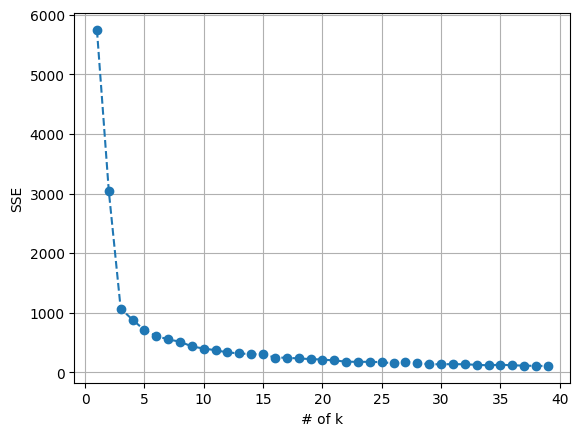

In [330]:
def elbow_method(X, K_list):
    S = np.zeros(len(K_list))
    #print(sse)
    for i in K_list:
        #print(i)
        M, U = kmeans(X, i)
        #print(np.shape(U))
        for j in range(len(X)):
            S[i-1] = S[i-1] + math.pow(np.linalg.norm(X[j]-M[[q for q in range(len(U[j,:])) if U[j,q] == 1][0]]),2)
    return S

# the rest of the code...

k= np.array(range(1,40,1))
X = load_data('Image.csv')
sse = elbow_method(X,k)


plt.plot(k,sse,marker = 'o', linestyle='--')
plt.grid()
plt.ylabel("SSE")
plt.xlabel("# of k")
plt.show()

<font color="blue"> Choosing the optimal value of k :
<font color="blue"> In order to choose the optimal k, we must consider the minimization of the amount of SSE at the same time. And at the same time, the complexity or equivalent time of calculations should not be too high.
As the value of k increases, the complexity of calculations also increases.
As a result, the optimal point is where there is not too much k, and the amount of SSE has decreased a lot, and from that point on, there is no noticeable change in the slope and height of the graph.
Therefore, according to the diagram above, point k=3 is optimal.


# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [331]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [332]:
# Load Dataset
data = pd.read_csv('sentiment.csv' )

In [333]:
# TODO: First 25 rows of the dataset
for i in range(25):
    print(data.values[i])

[1 1
 'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'
 1]
[2 1
 'A series of escapades demonstrating the adage that what is good for the goose'
 2]
[3 1 'A series' 2]
[4 1 'A' 2]
[5 1 'series' 2]
[6 1
 'of escapades demonstrating the adage that what is good for the goose' 2]
[7 1 'of' 2]
[8 1 'escapades demonstrating the adage that what is good for the goose' 2]
[9 1 'escapades' 2]
[10 1 'demonstrating the adage that what is good for the goose' 2]
[11 1 'demonstrating the adage' 2]
[12 1 'demonstrating' 2]
[13 1 'the adage' 2]
[14 1 'the' 2]
[15 1 'adage' 2]
[16 1 'that what is good for the goose' 2]
[17 1 'that' 2]
[18 1 'what is good for the goose' 2]
[19 1 'what' 2]
[20 1 'is good for the goose' 2]
[21 1 'is' 2]
[22 1 'good for the goose' 3]
[23 1 'good' 3]
[24 1 'for the goose' 2]
[25 1 'for' 2]


In [334]:
# TODO: Last 10 rows of the dataset
for i in range(10):
    print(data.values[len(data)+i-10])

[9991 419 'this a comedy or serious drama' 2]
[9992 419 'a comedy or serious drama' 2]
[9993 419 'a comedy or' 2]
[9994 419 'a comedy' 2]
[9995 419 'serious drama' 2]
[9996 420 'plays like some corny television production from a bygone era'
 1]
[9997 420 'plays like some corny television' 1]
[9998 420 'like some corny television' 2]
[9999 420 'some corny television' 1]
[10000 420 'corny television' 1]


In [335]:
# TODO: information of columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


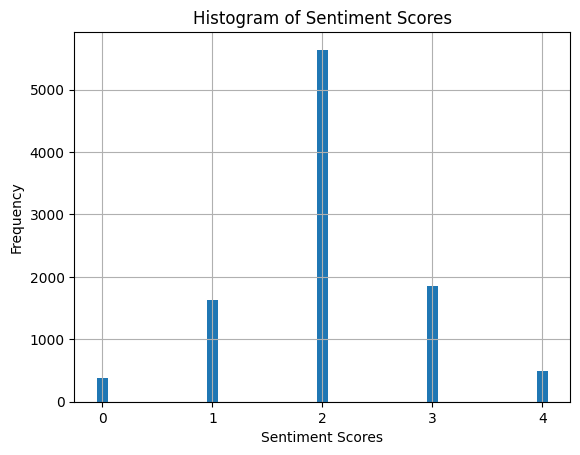

In [336]:
# TODO: histogram of sentiment scores
Sentiments = np.array(data['Sentiment'].values)
plt1 = plt.hist(Sentiments,rwidth=0.1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5],align='mid')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')
plt.grid(True)

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [337]:
def preprocess_text(text):

    # TODO:
    lower_text = text.lower()
    remove_punctuation = re.sub(r'[^\w\s]','', lower_text)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(remove_punctuation)

    filtered_tokens = [tokens for tokens in tokens if tokens not in stop_words]
    text = ' '.join(filtered_tokens)

    return text

In [338]:
# TODO: Apply the preprocessing function to the text column
texts = np.array(data['Phrase'].values)
print("For example:")
print("before preprocessing:")
print(texts[0])
preprocessing_texts = list(map(lambda text: preprocess_text(text), texts))
print("after preprocessing:")
print(preprocessing_texts[0])

For example:
before preprocessing:
A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
after preprocessing:
series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story


### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

The Bag-of-Words (BoW) technique is a text representation model that converts text into fixed-length vectors by counting how many times each word appears in the text. The BoW model is often used in Natural Language Processing (NLP) tasks like text classification. The BoW model is a simple and inexpensive way to represent text data, and it is implemented in Python using built-in functions.

To implement the BoW model in Python, We can use the CountVectorizer class from the sklearn.feature_extraction.text module. This class converts a collection of text documents to a matrix of token counts. The CountVectorizer class has several parameters that allow you to customize the vectorization process, such as stop_words to remove stop words, ngram_range to specify the range of n-grams to be extracted, and max_features to limit the number of features in the output matrix.

Another way to implement the BoW model in Python is to use the Tokenizer class from the keras.preprocessing.text module. This class allows to vectorize a corpus of text documents into a sequence of integers. The Tokenizer class has several methods that allow to customize the vectorization process, such as num_words to limit the number of words to be considered, oov_token to specify the token for out-of-vocabulary words, and filters to specify the characters to be filtered out.

CountVectorizer operates by tokenizing the text data and counting the occurrences of each token. It then creates a matrix where the rows represent the documents, and the columns represent the tokens. The cell values indicate the frequency of each token in each document. This matrix is known as the “document-term matrix.

In summary, the BoW technique is a simple and effective way to represent text data in a fixed-length vector format. Python provides built-in functions like CountVectorizer and Tokenizer to implement the BoW model, making it easy to use in NLP tasks.

In [339]:
# TODO: Extract features from the preprocessed text data

# Extracting the text and labels from your data

vectorizer = CountVectorizer()
preprocessing_texts_vectors = vectorizer.fit_transform(preprocessing_texts)


#print(preprocessing_texts_vectors.toarray())
#print(vectorizer.vocabulary_.keys())
#print(preprocessing_texts_vectors)

### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [340]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessing_texts_vectors, Sentiments, test_size=0.25, random_state=19)

# TODO: Train a linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# TODO: Make predictions on the testing set
predict = linear_regression_model.predict(X_test)

# TODO: Evaluate the model using mean squared error
MSE = mean_squared_error(y_test, predict)
print('Mean Squared Error :', MSE)

Mean Squared Error : 0.3827282477670362


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

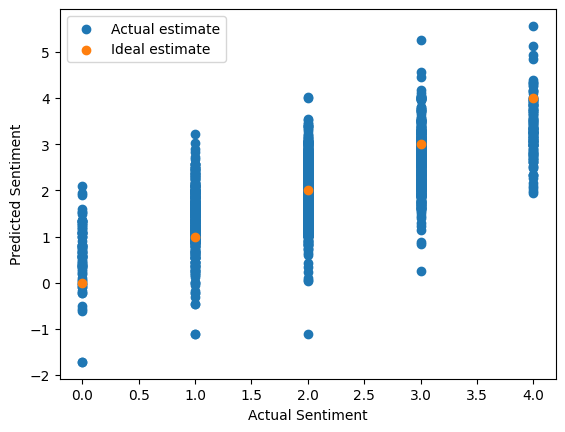

In [341]:
plt.scatter(y_test, predict,label='Actual estimate')
plt.scatter([0,1,2,3,4],[0,1,2,3,4],label='Ideal estimate')
plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.legend()
plt.show()

## <font color="red"> Discuss the resulted figure </font>

According to the obtained graph, we can see that this estimate predicts a number close to 1 for the data that should have been 0, and for the data that should have been 1, it predicts the same 1 with a small error. and for the data that should have been 2, it has produced the same 2 with good accuracy on average, and for the data that should have been 3, it has predicted less than 3 with a small error, and for the data that should have been 4, the error is more and the average estimate is close to 3.

As a result, this method for estimating actual data equal to 0 and 4 has more error than actual data equal to 2.

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [342]:
words = np.array([])
for i in range(len(preprocessing_texts)):
    words = np.append(words,preprocessing_texts[i].split())
words = set(words)

new_preprocessing_texts_vectors = [[1 if word in Phrase else 0 for word in words] for Phrase in preprocessing_texts]

#print(words)
print("# of words :",str(len(words)))
print("shape of new vector :",np.shape(new_preprocessing_texts_vectors))

# of words : 2451
shape of new vector : (10000, 2451)
